In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
# DatetiemIndex
dates = pd.date_range('2020-01-01', periods=48, freq='M')
# additive model: trend + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10*np.sin(np.linspace(0, 3.14*2, 48))
seasonal_factor = 7*np.sin(np.linspace(0, 3.14*8, 48))
np.random.seed(2004)
irregular_factor = 2*np.random.randn(len(dates))
df = pd.DataFrame({'timeseries': trend_factor + cycle_factor + seasonal_factor + irregular_factor, 'trend': trend_factor,
'cycle': cycle_factor, 'seasonal': seasonal_factor, 'irregular': irregular_factor}, index=dates)

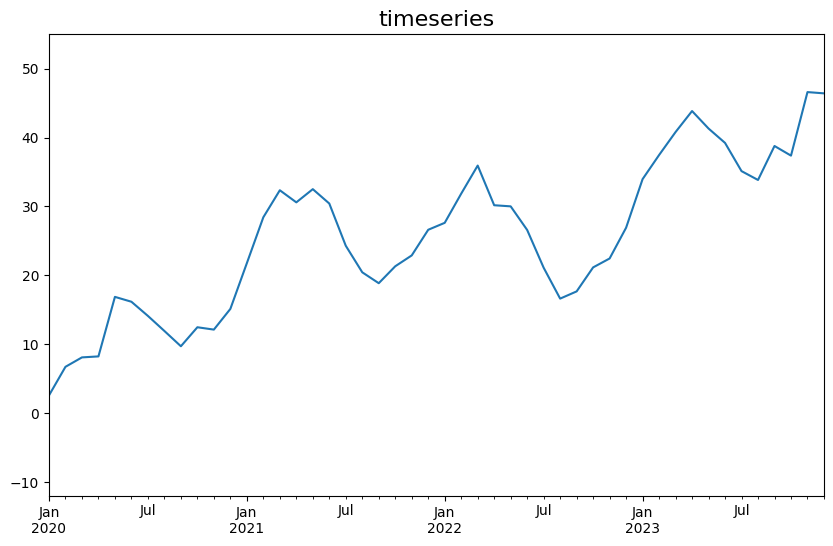

In [32]:
plt.figure(figsize=[10, 6])
df.timeseries.plot()
plt.title('timeseries', fontsize=16)
plt.ylim(-12, 55)
plt.show()

Text(0.5, 1.0, 'Close Price for Apple')

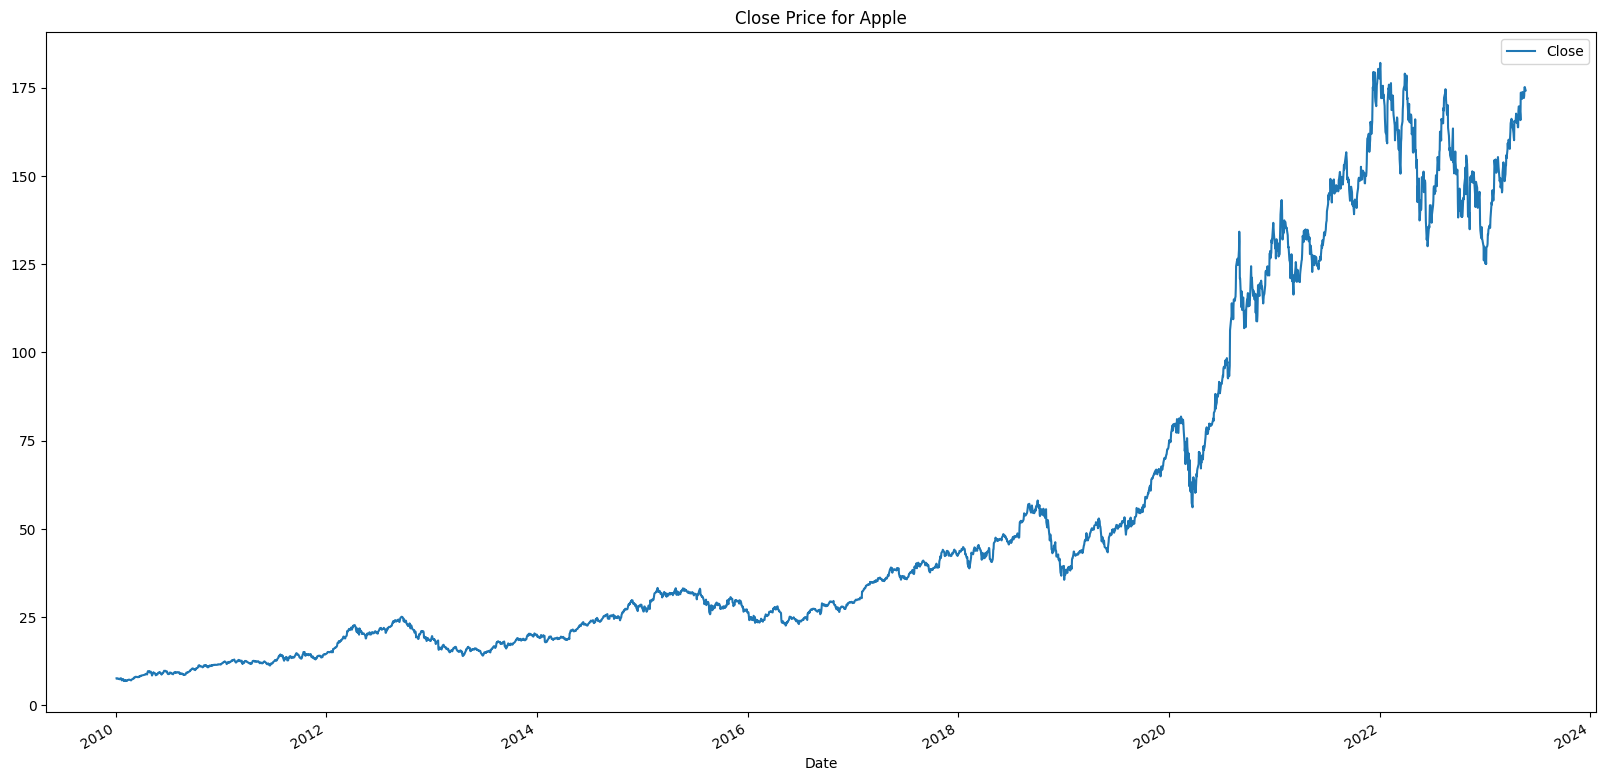

In [60]:
import FinanceDataReader as fdr
# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러오기
df_apple = fdr.DataReader('AAPL', start = '2010')
# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

<Axes: xlabel='Date'>

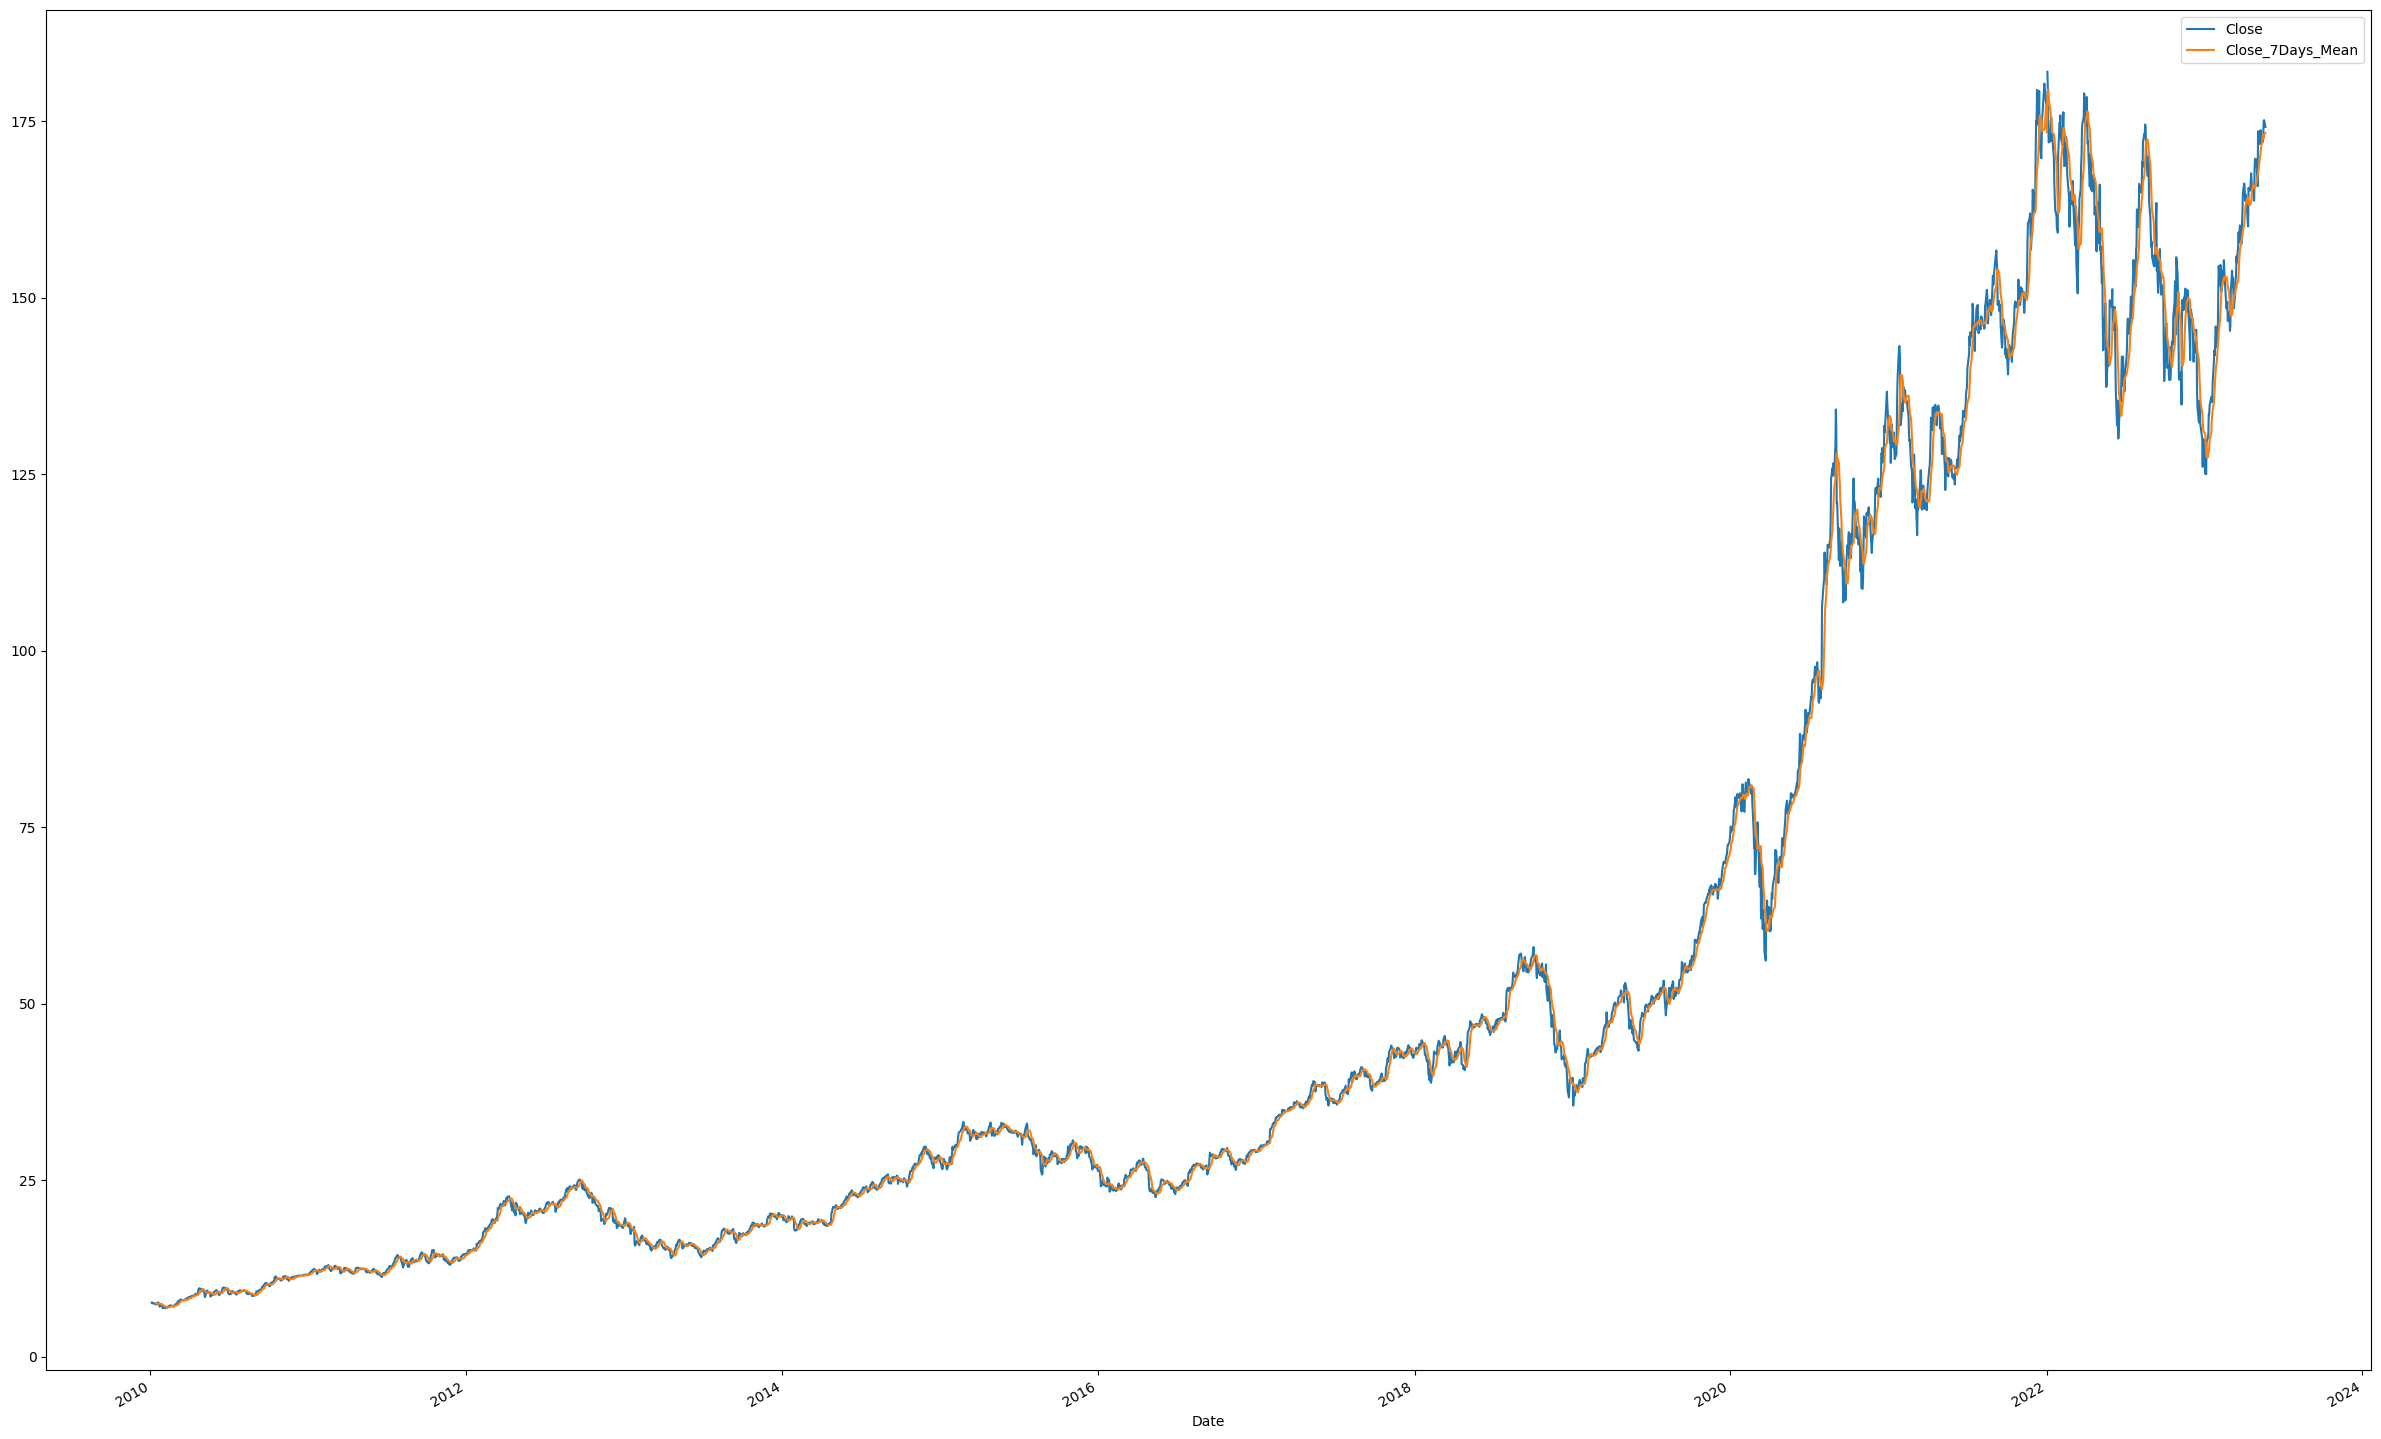

In [61]:
from datetime import datetime
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))
# 7일전 평균값 그래프 + 종가 그래프

Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

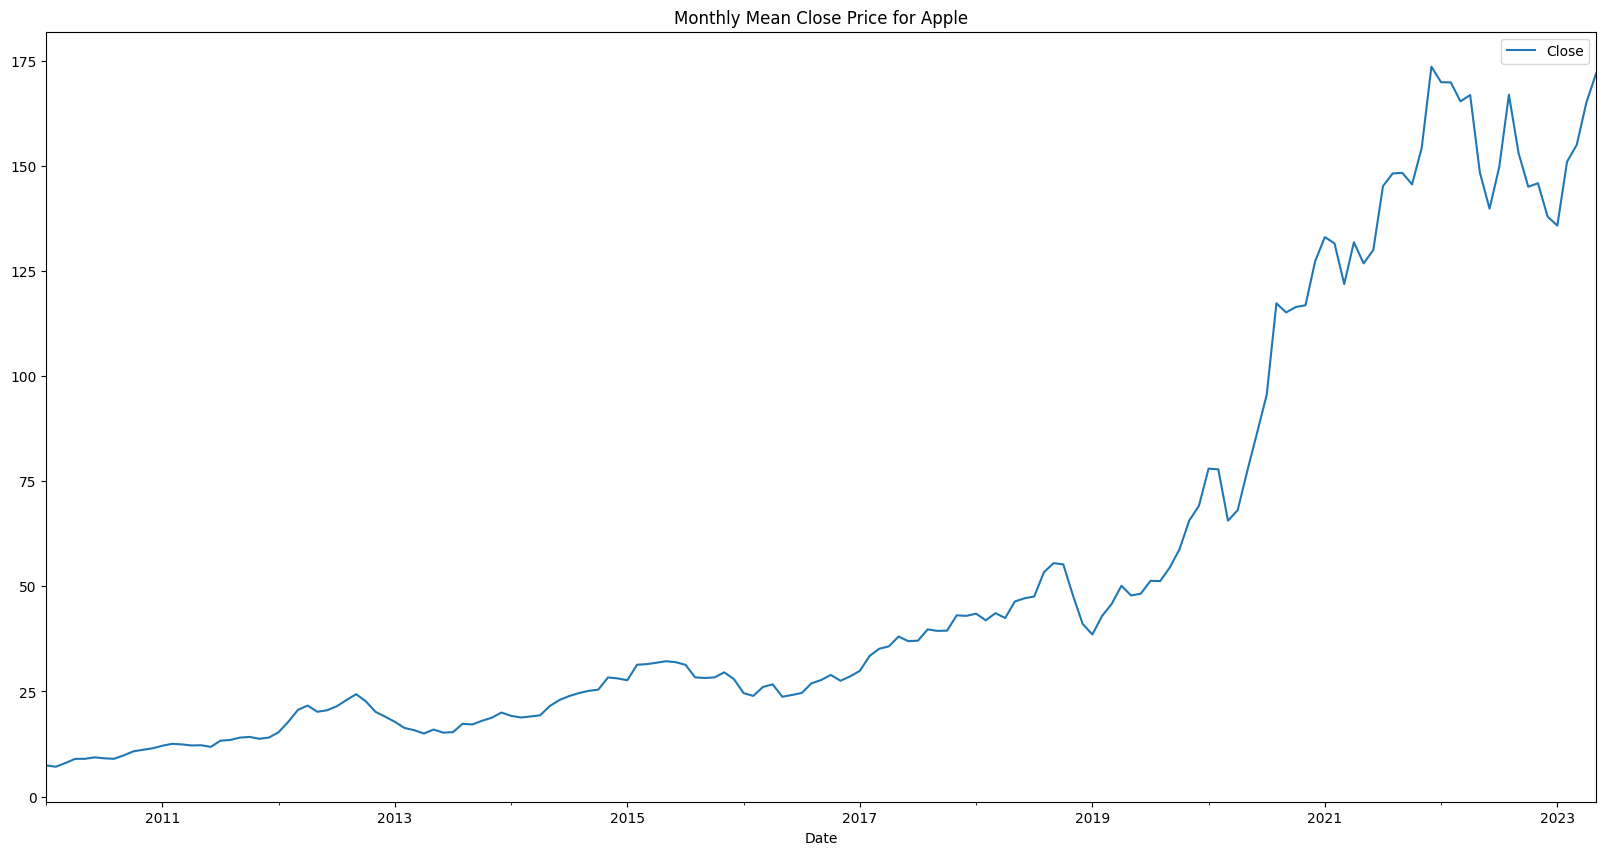

In [62]:
# 월단위로 주식 가격의 평균을 샘플링
df_apple_monthly = df_apple.resample(rule='M').mean()
# 마지막 컬럼(Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:,:-1]
# 월별 주가(종가)를 시각화
df_apple_monthly[['Close']].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

<Axes: xlabel='Date'>

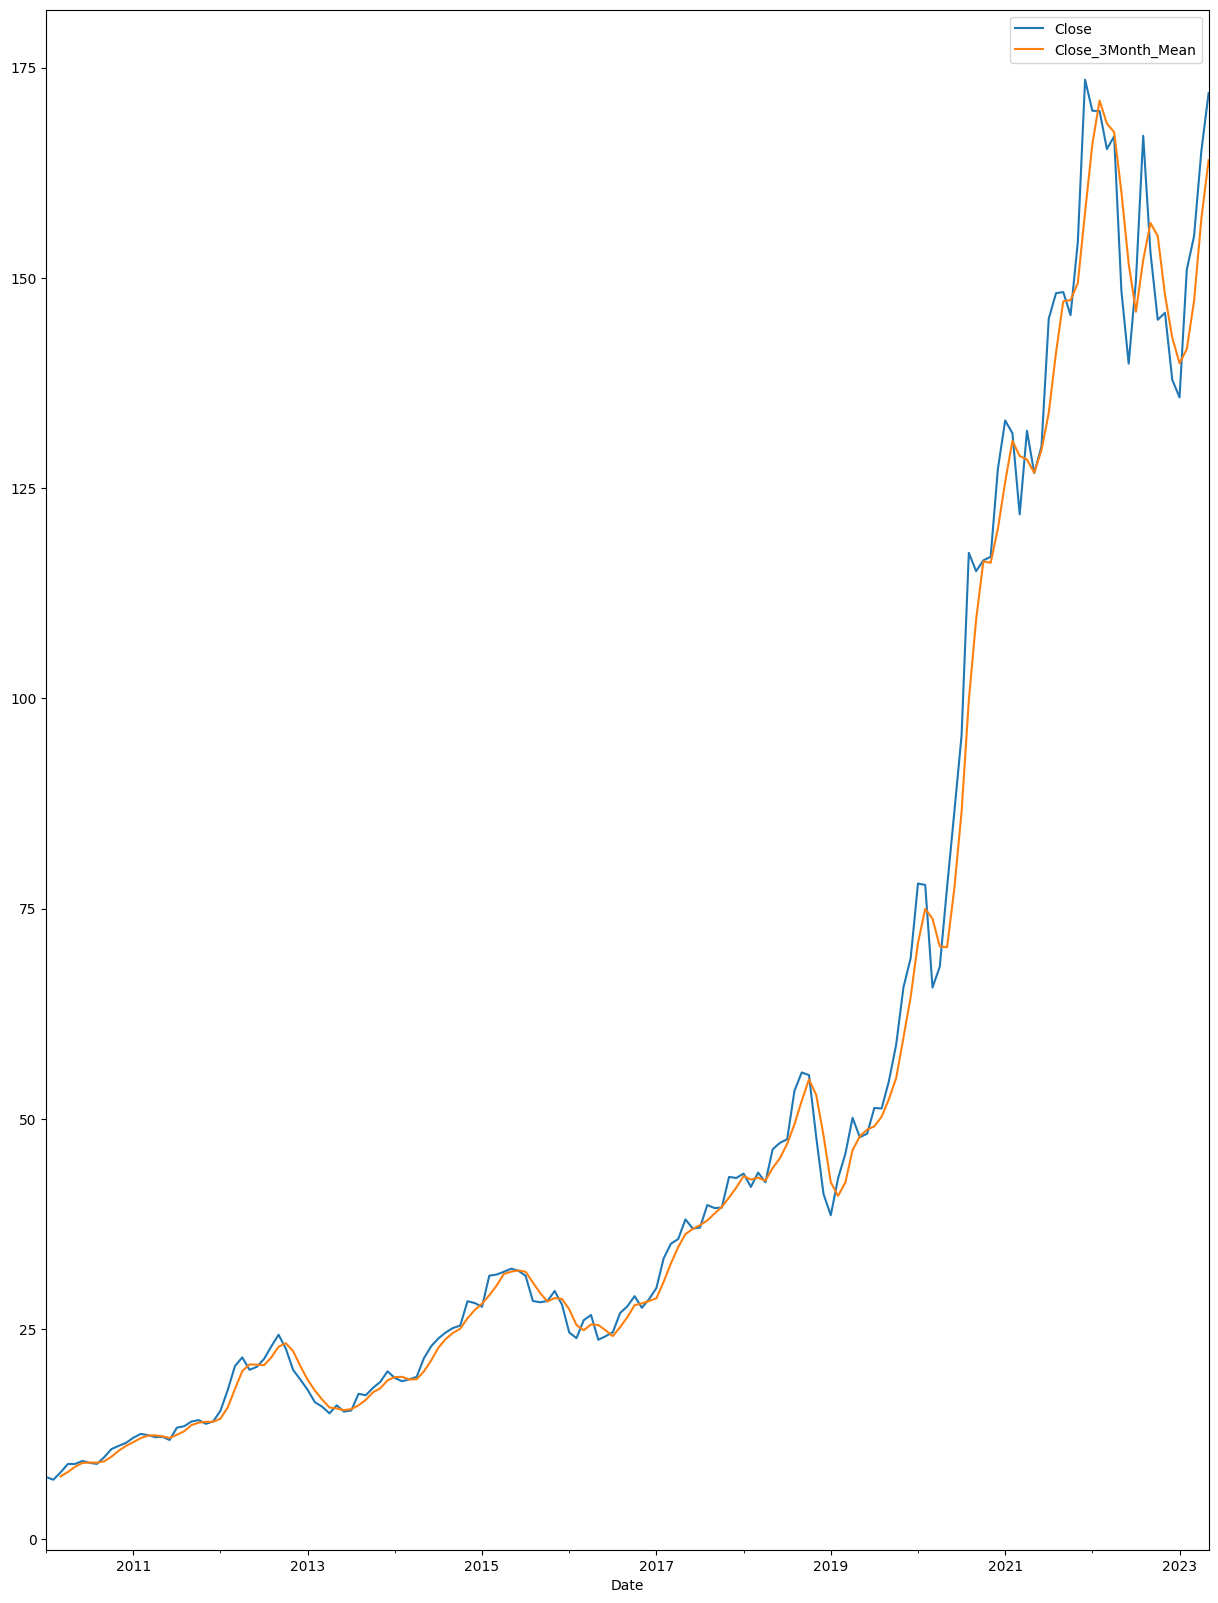

In [63]:
#월단위 평균값을 또 3개월치씩 이동평균을 적용하는 코드
df_apple_monthly[['Close_3Month_Mean']] = df_apple_monthly[['Close']].rolling(3).mean()
df_apple_monthly[['Close', 'Close_3Month_Mean']].plot(figsize=(15,20))

In [72]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import requests

# # Download the file
# file_url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
# response = requests.get(file_url)
# with open('a10.csv', 'wb') as file:
#     file.write(response.content)

# Read the CSV file
df = pd.read_csv('a10.csv')
df.head(12)

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


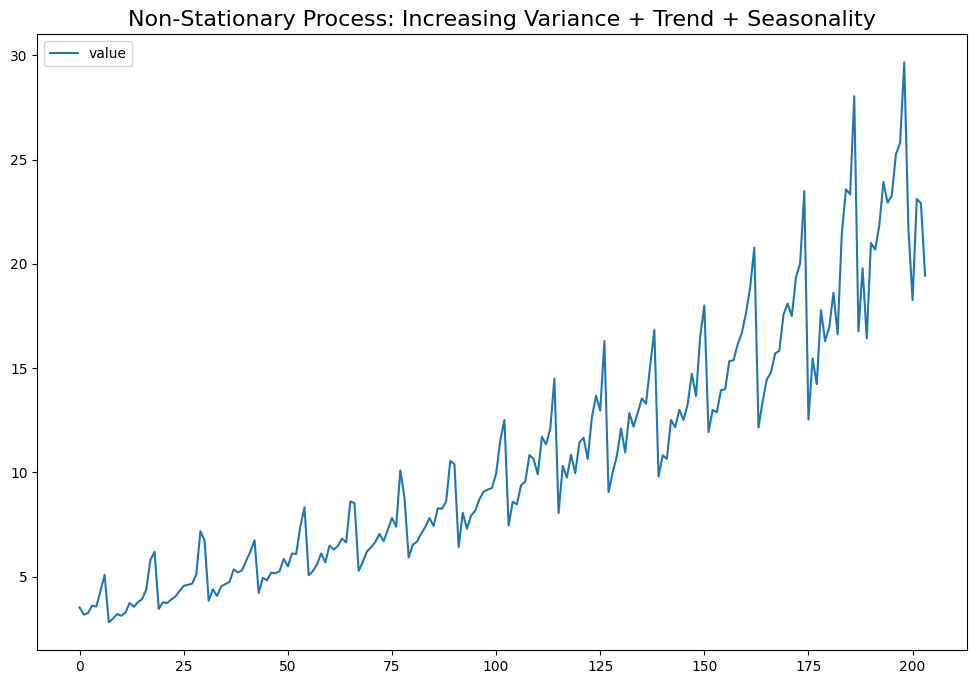

In [73]:
df.plot(figsize=[12, 8])
plt.title('Non-Stationary Process: Increasing Variance + Trend + Seasonality', fontsize=16)
plt.show()

In [75]:
df_vst = np.log(df.value)
df_vst.head()

0    1.260332
1    1.157161
2    1.179338
3    1.283986
4    1.271408
Name: value, dtype: float64

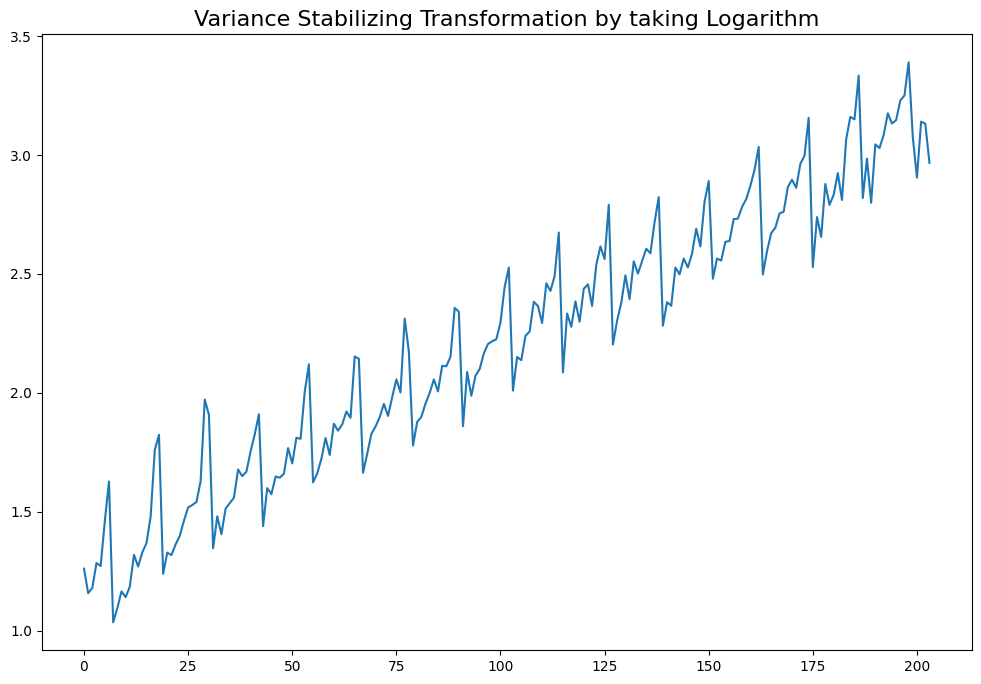

In [77]:
df_vst.plot(figsize=(12, 8))
plt.title("Variance Stabilizing Transformation by taking Logarithm", fontsize=16)
plt.show()

<Axes: >

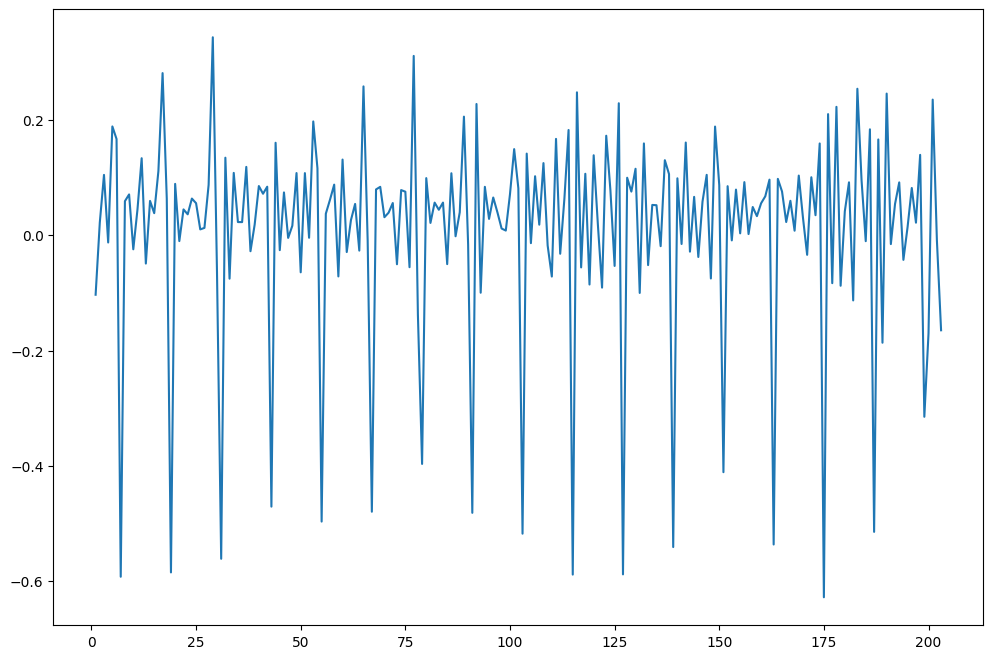

In [78]:
## De-trend by Differencing
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1
plt.figure(figsize=(12,8))
df_vst_diff1.plot()
# plt.title("De-trend by 1st order Differencing", fontsize=16)
# # plt.show()

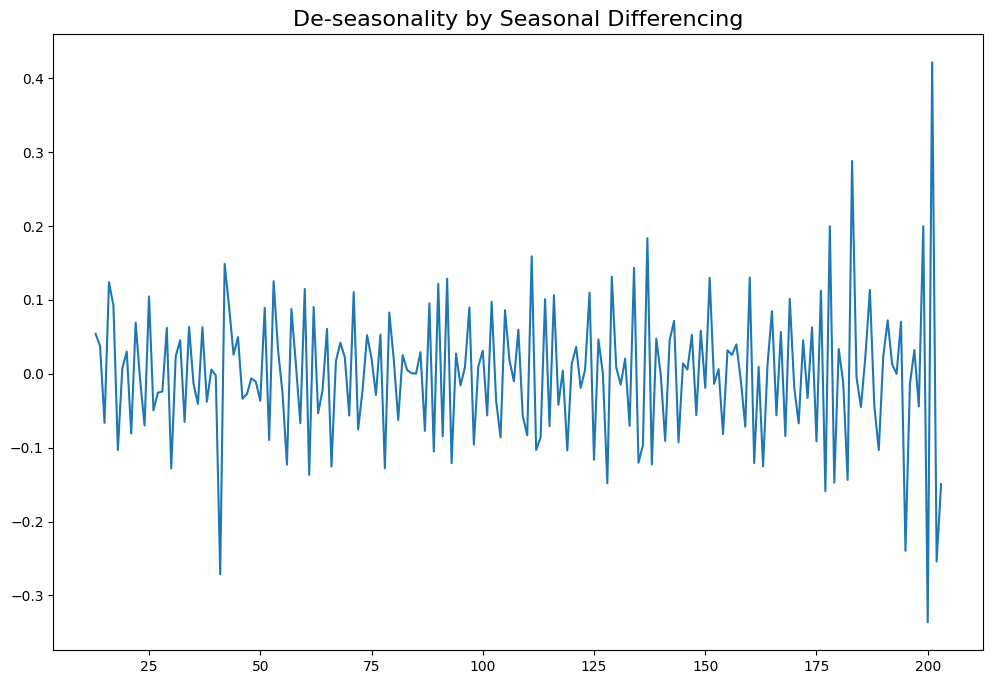

In [80]:
## Stationary Process: De-seasonality by Seasonal Differencing
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()
## plotting
plt.figure(figsize=(12,8))
df_vst_diff1_diff12.plot()
plt.title("De-seasonality by Seasonal Differencing", fontsize=16)
plt.show()